In [53]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import zscore
import matplotlib.pyplot as plt
from statsmodels.graphics.regressionplots import influence_plot
import warnings
import seaborn as sn
warnings.filterwarnings('ignore')

salary_df=pd.read_csv('salary2.csv')
salary_df_features=salary_df.drop(['Ann Income','Sr'],axis=1)

In [93]:
X_features=salary_df_features.columns
X=sm.add_constant(salary_df_features)
Y=salary_df['Ann Income']
train_X,test_X,train_Y,test_Y=train_test_split(X,Y,train_size=0.8,random_state=42)

In [56]:
print(X_features)
salary_model=sm.OLS(train_Y,train_X).fit()
salary_model.summary2()

Index(['Percentage', 'Salary', 'employability'], dtype='object')


<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Ordinary least squares
========================================================================================
Model:                     OLS                     Adj. R-squared:            1.000     
Dependent Variable:        Ann Income              AIC:                       -519.7583 
Date:                      2023-09-20 15:48        BIC:                       -513.0028 
No. Observations:          40                      Log-Likelihood:            263.88    
Df Model:                  3                       F-statistic:               8.665e+19 
Df Residuals:              36                      Prob (F-statistic):        0.00      
R-squared:                 1.000                   Scale:                     1.2112e-07
----------------------------------------------------------------------------------------
                  Coef.     Std.Err.        t         P>|t|      [0.025        0.975]   
----------------------------------------------------------------------------------------
const                0.0004   0.0007           0.6305 0.5323       -0.0010        0.0019
Percentage    -9920000.0000   0.0021 -4710303333.7588 0.0000 -9920000.0043 -9919999.9957
Salary               2.0000   0.0000   920493689.3429 0.0000        2.0000        2.0000
employability   100000.0000   0.0000  4702998551.0724 0.0000   100000.0000   100000.0000
----------------------------------------------------------------------------------------
Omnibus:                     1.817               Durbin-Watson:                 0.010   
Prob(Omnibus):               0.403               Jarque-Bera (JB):              1.668   
Skew:                        -0.473              Prob(JB):                      0.434   
Kurtosis:                    2.673               Condition No.:                 10748770
========================================================================================
* The condition number is large (1e+07). This might indicate             strong
multicollinearity or other numerical problems.
"""

In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def get_vif_factors( X ): 
    X_matrix = X.values
    vif = [ variance_inflation_factor( X_matrix, i ) for i in range ( X_matrix.shape[1] ) ]
    vif_factors = pd.DataFrame()
    vif_factors['column'] = X.columns
    vif_factors['VIF'] = vif
    return vif_factors

In [58]:
vif_factors=get_vif_factors(X[X_features])

In [59]:
vif_factors

,column,VIF
0,Percentage,1.677378e+06
1,Salary,4.733805e+01
2,employability,1.691697e+06


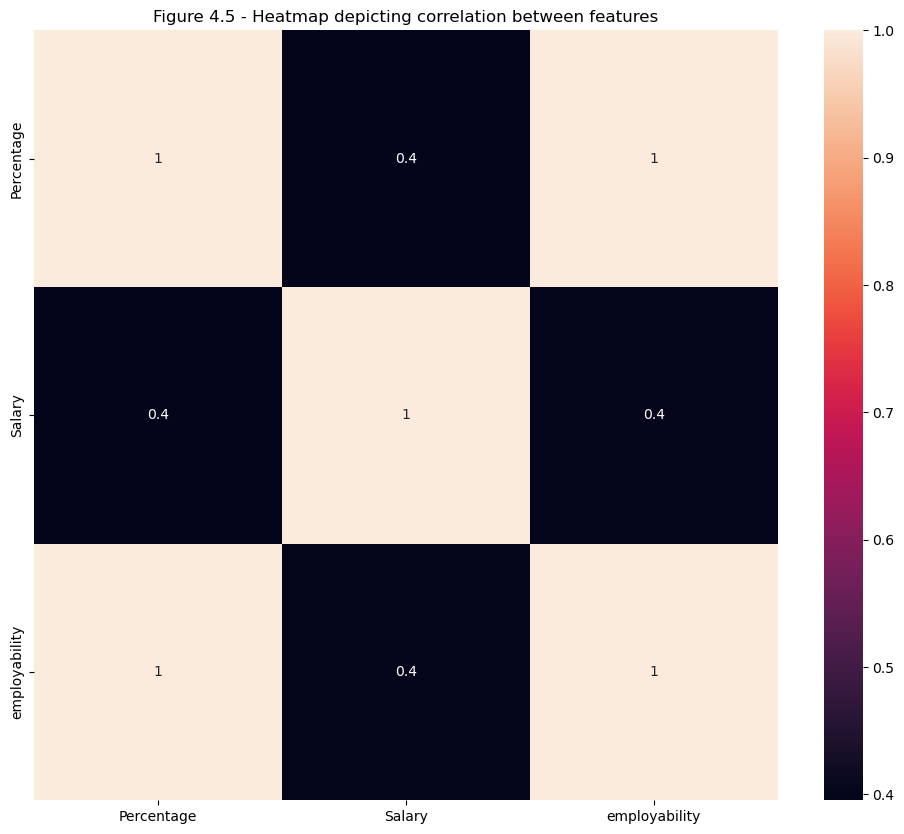

In [60]:
columns_with_large_vif = vif_factors[vif_factors.VIF > 4].column
plt.figure( figsize = (12,10) )
sn.heatmap( X[columns_with_large_vif].corr(), annot = True );
plt.title("Figure 4.5 - Heatmap depicting correlation between features");

In [66]:
salary_df_newFeatures1=salary_df_features.drop(['Percentage'],axis=1)

In [95]:
X_features1=salary_df_newFeatures1.columns
X1=sm.add_constant(salary_df_newFeatures1)
Y1=salary_df['Ann Income']
train_X1,test_X1,train_Y1,test_Y1=train_test_split(X1,Y1,train_size=0.8,random_state=42)
salary_model1=sm.OLS(train_Y1,train_X1).fit()
salary_model1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
===============================================================================
Model:                  OLS                  Adj. R-squared:         0.910     
Dependent Variable:     Ann Income           AIC:                    1116.7424 
Date:                   2023-09-20 16:32     BIC:                    1121.8090 
No. Observations:       40                   Log-Likelihood:         -555.37   
Df Model:               2                    F-statistic:            198.2     
Df Residuals:           37                   Prob (F-statistic):     1.69e-20  
R-squared:              0.915                Scale:                  7.2630e+10
-------------------------------------------------------------------------------
                 Coef.       Std.Err.     t    P>|t|     [0.025       0.975]   
-------------------------------------------------------------------------------
const         2805009.9237 292623.7430  9.5857 0.0000 2212097.9010 3397921.9463
Salary             11.5883      0.5883 19.6987 0.0000      10.3964      12.7803
employability    -154.9225     46.4929 -3.3322 0.0020    -249.1261     -60.7190
-------------------------------------------------------------------------------
Omnibus:                  2.785            Durbin-Watson:               1.799  
Prob(Omnibus):            0.248            Jarque-Bera (JB):            1.669  
Skew:                     0.235            Prob(JB):                    0.434  
Kurtosis:                 2.117            Condition No.:               1853711
===============================================================================
* The condition number is large (2e+06). This might indicate             strong
multicollinearity or other numerical problems.
"""

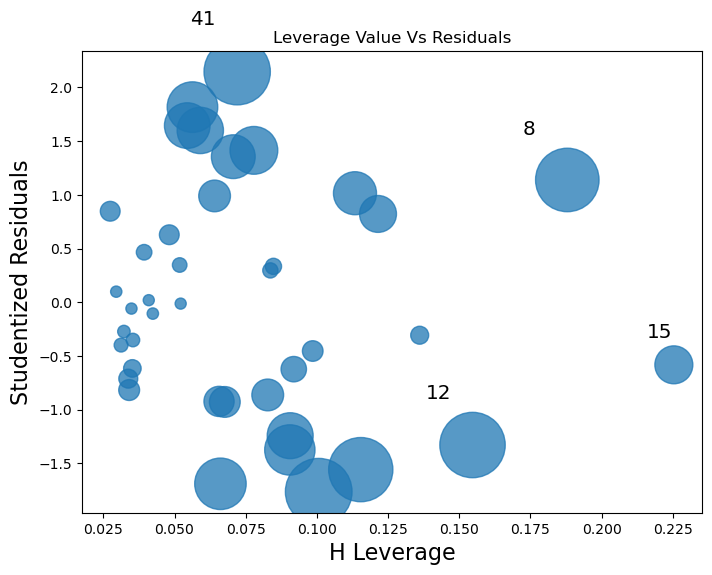

In [76]:
fig, ax = plt.subplots( figsize=(8,6) )
influence_plot( salary_model1, ax = ax ) 
plt.title("Leverage Value Vs Residuals") 
plt.show()

In [77]:
k=train_X1.shape[1]
n=train_X1.shape[0]
leverage_cut_off=3*((k+1)/n)
print(leverage_cut_off)

0.30000000000000004


In [88]:
pred_y = salary_model1.predict(test_X1)

In [89]:
print(pred_y)

13    6.734679e+06
39    4.317080e+06
30    4.544048e+06
45    4.000726e+06
17    4.991933e+06
48    4.566201e+06
26    4.116608e+06
25    4.702069e+06
32    5.429437e+06
19    4.487932e+06
dtype: float64


In [90]:
from sklearn import metrics
np.round(metrics.r2_score(pred_y, test_Y1), 2 )

0.81

In [91]:
pred_y_old = salary_model.predict(test_X)

In [92]:
np.round(metrics.r2_score(pred_y_old, test_Y), 2 )

1.0